# 📌 Task 3: Data Visualization
### Internship - CodeAlpha

---

## 🎯 Objective

In this task, we will create visualizations from our cleaned quotes dataset to:
- Highlight top authors
- Show popular tags
- Analyze quote length patterns
- Gain insights through visuals

We'll use `Matplotlib`, `Seaborn`, and optionally `WordCloud`.

---


In [ ]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud
import re


# Load the updated cleaned data
df = pd.read_csv("quotes_data_cleaned.csv")
# If 'tags' is a stringified list, convert back to list
df['tags'] = df['tags'].apply(eval)
df.head()


,quote,author,tags,quote_length
0,“Be yourself; everyone else is already taken.”...,Oscar Wilde,"[attributed-no-source, be-yourself, gilbert-pe...",60
1,"“I'm selfish, impatient and a little insecure....",Marilyn Monroe,"[attributed-no-source, best, life, love, misat...",221
2,"“So many books, so little time.” ― Frank Zappa",Frank Zappa,"[books, humor]",46
3,“Two things are infinite: the universe and hum...,Albert Einstein,"[attributed-no-source, human-nature, humor, in...",115
4,“A room without books is like a body without a...,Marcus Tullius Cicero,"[attributed-no-source, books, simile, soul]",77


In [ ]:
# change figure style
plt.style.use('ggplot')

## 1️⃣ Top 10 Most Quoted Authors

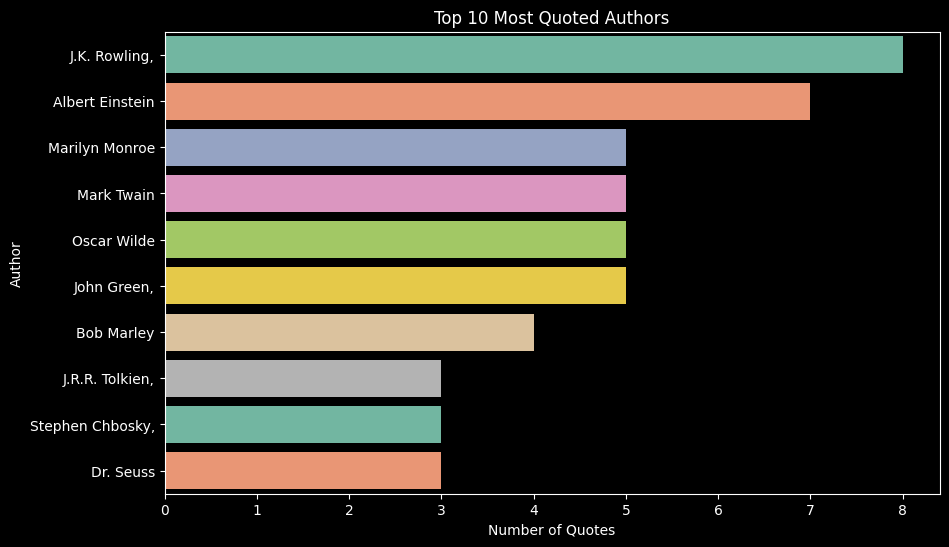

In [ ]:
top_authors = df['author'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_authors.values, y=top_authors.index, hue=top_authors.index, legend=False, palette='Set2')
plt.title("Top 10 Most Quoted Authors")
plt.xlabel("Number of Quotes")
plt.ylabel("Author")
plt.show()

## 2️⃣ Top Tags -[link text](https://) Pie Chart

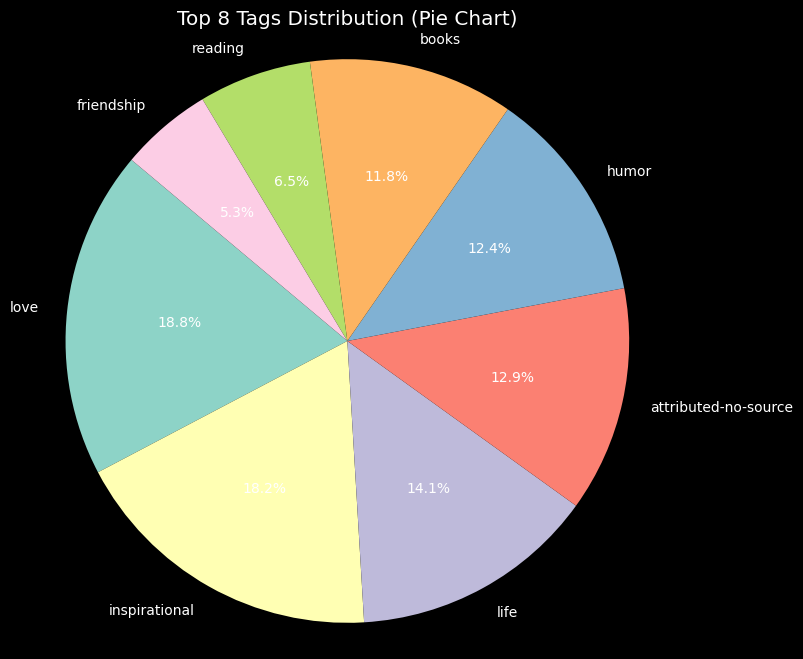

In [ ]:
# Count tag frequency
all_tags = sum(df['tags'].tolist(), [])
tag_counts = Counter(all_tags)
tag_df = pd.DataFrame(tag_counts.items(), columns=['Tag', 'Count']).sort_values(by='Count', ascending=False)

plt.figure(figsize=(8, 8))
plt.pie(tag_df['Count'].head(8), labels=tag_df['Tag'].head(8), autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set3'))
plt.title("Top 8 Tags Distribution (Pie Chart)")
plt.axis('equal')
plt.show()


## 3️⃣ Quote Length – Histogram

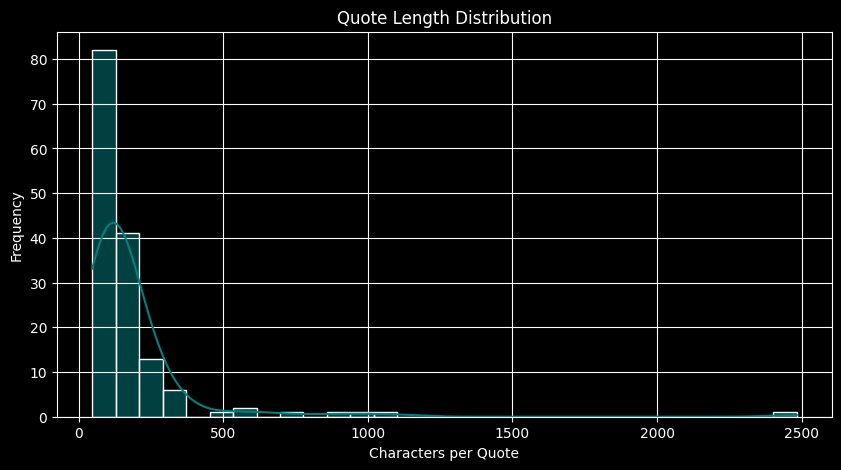

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(df['quote_length'], bins=30, kde=True, color='teal')
plt.title("Quote Length Distribution")
plt.xlabel("Characters per Quote")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


## 4️⃣ Quote Length – Box Plot

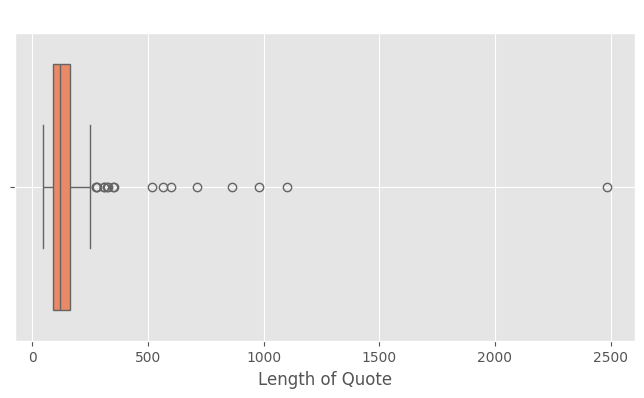

In [ ]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['quote_length'], color='coral')
plt.title("Box Plot of Quote Lengths")
plt.xlabel("Length of Quote")
plt.grid(True)
plt.show()


## 5️⃣ Tags Appearing More Than 10 Times

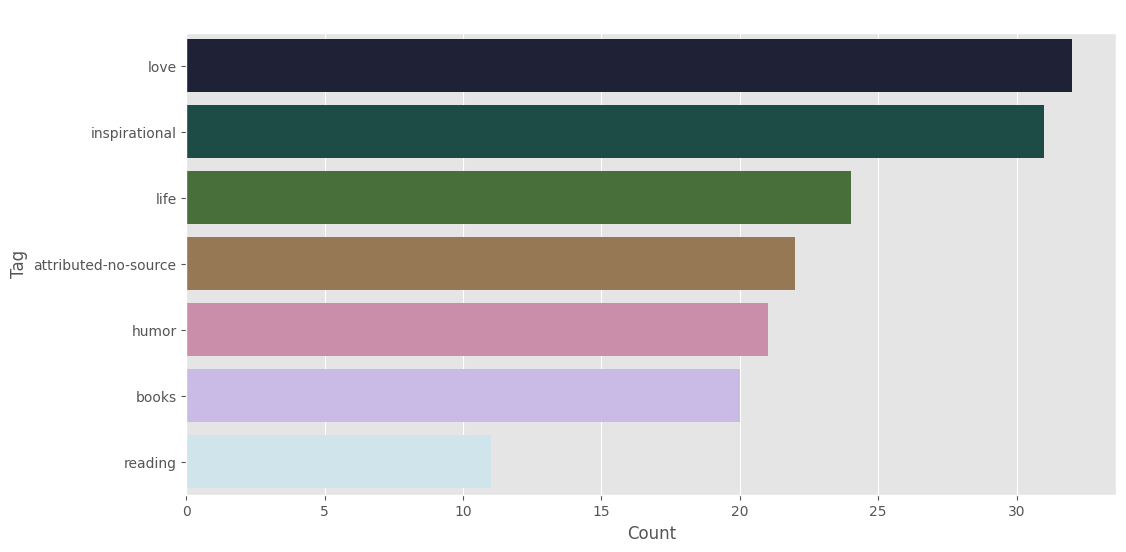

In [ ]:
filtered_tags = tag_df[tag_df['Count'] > 10]

plt.figure(figsize=(12, 6))
sns.barplot(x=filtered_tags['Count'], y=filtered_tags['Tag'], hue=filtered_tags['Tag'],legend=False, palette='cubehelix')
plt.title("Tags Appearing More Than 10 Times")
plt.xlabel("Count")
plt.ylabel("Tag")
plt.show()

## 6️⃣ Author vs Average Quote Length – Heatmap

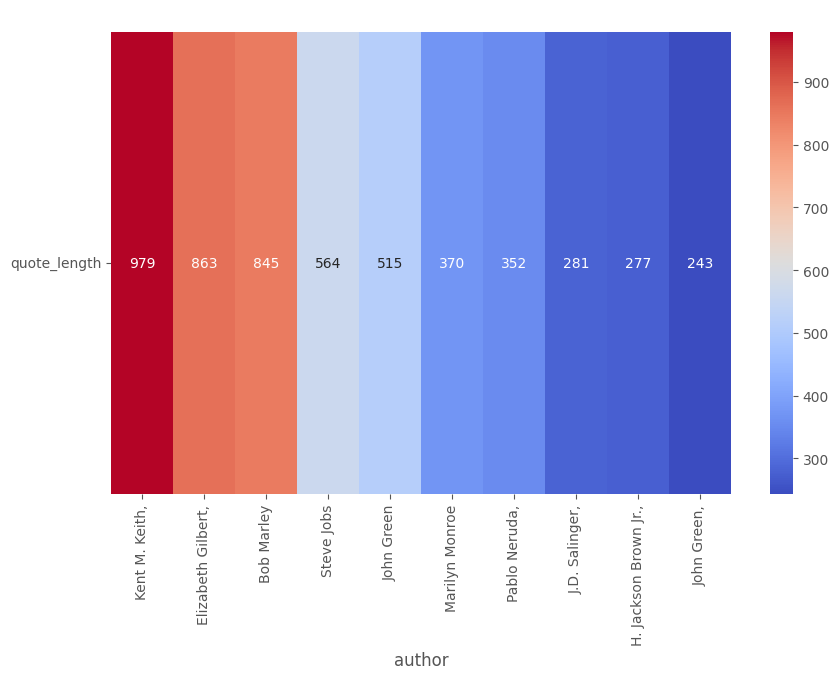

In [ ]:
author_length = df.groupby('author')['quote_length'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.heatmap(author_length.to_frame().T, cmap='coolwarm', annot=True, fmt=".0f")
plt.title("Average Quote Length of Top Authors")
plt.yticks(rotation=0)
plt.show()


## 7️⃣ WordCloud – Frequent Words in Quotes

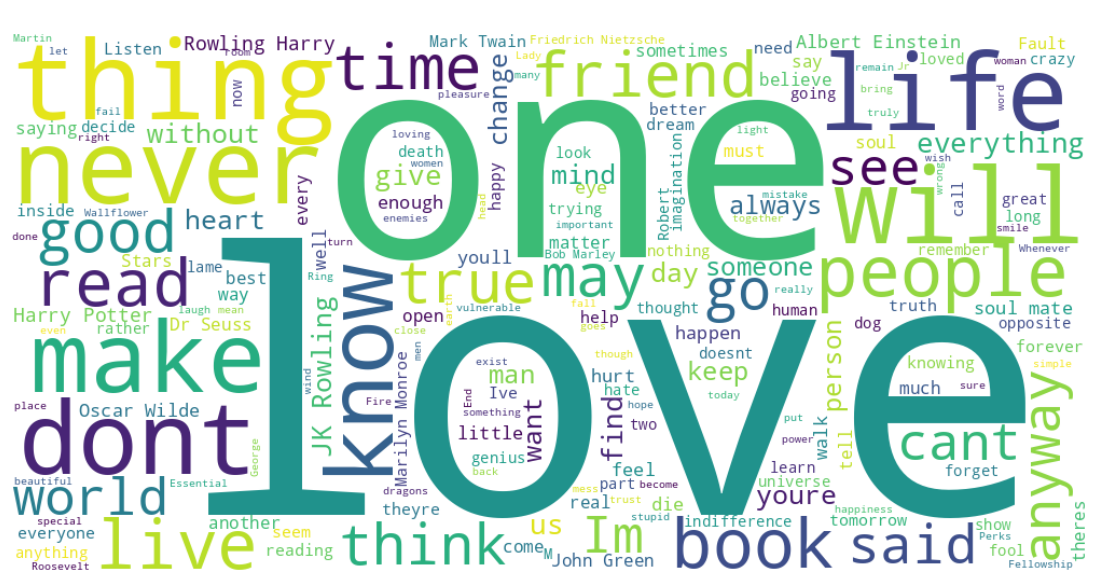

In [ ]:
all_text = " ".join(df['quote'])
clean_text = re.sub(r'[^A-Za-z\s]', '', all_text)

wordcloud = WordCloud(width=1000, height=500, background_color='white').generate(clean_text)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud - Frequent Words in Quotes")
plt.show()


## 8️⃣ WordCloud – Tags

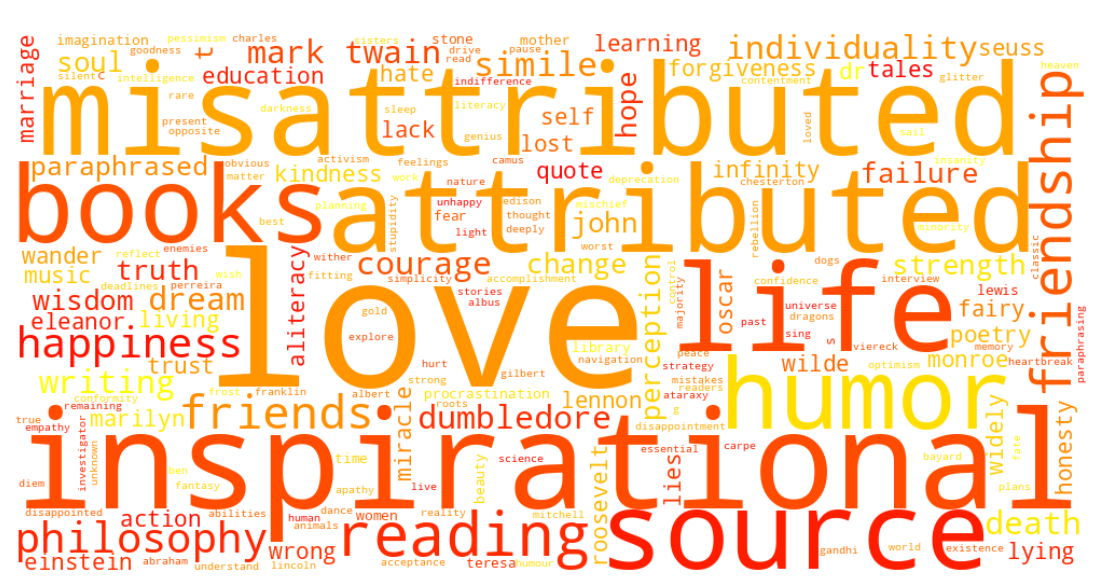

In [ ]:
tags_text = " ".join(all_tags)

tag_wordcloud = WordCloud(width=1000, height=500, background_color='white', colormap='autumn').generate(tags_text)

plt.figure(figsize=(15, 7))
plt.imshow(tag_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud - Tags")
plt.show()


## 🔍 Insights

- Quotes are mostly between 80-200 characters long.
- Top authors: J.K Rowling, Albert Einstein, etc.
- Top tags are love, life, inspiration, truth, humor.
- Most frequent words: life, love, one, thing.
- Tags like "love" and "inspiartion" are visually dominant.

Now we'll analyze [**Sentiments**](https://github.com/GhulamMuhammadNabeel/code_alpha_data_analysis/blob/main/CodeAlpha_task4_sentiment_analysis.ipynb)

